# Семестровый мини-проект

## Задача

Необходимо выполнить анализ датасета, применив полученные знания из пройденных тем. Для анализа могут быть выбраны любые данные: как уже готовые датасеты из Kaggle или любого другого источника, так и самостоятельно собранные данные. Так как в задании предстоит использовать предсказание по временным рядам, то необходимо выбрать такой датасет, в котором признаки можно было агрегировать по времени. Работы выполняются индивидуально. Проект НЕ является обязательным.

## Критерии

* Сложность используемого датасета (2 балла) – датасет не должен быть "игрушечный", самое лучшее, чтобы это были реальные данные, взятые из реального мира, максимально непредобработанные (например – логи посещения сайтов пользователями). В проекте можно работать как с одной таблицей, так и с несколькими.
* Первичный анализ данных (1 балл) – изучить и описать, как были собраны данные, какие признаки, типы переменных есть в датасете. Описать, как будет происходить исследование, какая цель вашего проекта.
* Предобработка данных (2 балла) – выполнить необходимую агрегацию данных, убрать лишние поля и объекты, дать пояснения, если в предобработке данных нет необходимости – написать, почему.
* Визуальный анализ данных (3 балла) – использовать различные типы графиков, чтобы описать данные, все должно сопровождаться комментариями: какие зависимости или интересные инсайты были получены.
* Проверка статистических гипотез (5 баллов) - сформулировать статистические гипотезы в данных и проверить их с помощью статистических критериев (например - если это временной ряд, то изучить, изменились ли средние до и после определённого периода, или можно сравнить данные из разных групп). Как минимум – проверить 2 статистические гипотезы, должен быть использован любой параметрический и любой непараметрический критерий. Каждый шаг должен сопровождаться комментариями, должны быть сделаны выводы.
* Построить предсказание временного ряда (5 баллов).
* Сделать выводы о проделанном исследовании (2 балла) - указать, какие инсайты были найдены, о чем свидетельствует сделанный прогноз и выводы, полученные в ходе проверки статистических гипотез.

Каждый из смысловых блоков прошу выделять в вашей работе соответствующими заголовками.

### Форма предоставления
Jupyter-ноутбук в html-формате. В названии ноутбука должна быть указана фамилия и название группы. 

### Дедлайн
Все работы должны быть высланы до 16.12.2020 23:59:00 по МСК на почту k.izmailov@corp.mail.ru, c темой: Техносфера. Мини-проект. Группа <ваша группа>. <ваше имя и фамилия>

# Проект

## Датасет

Сложность используемого датасета (2 балла) – датасет не должен быть "игрушечный", самое лучшее, чтобы это были реальные данные, взятые из реального мира, максимально непредобработанные (например – логи посещения сайтов пользователями). В проекте можно работать как с одной таблицей, так и с несколькими.

Я решил взять данные отсюда: 

https://www.kaggle.com/aungpyaeap/supermarket-sales

Здесь представлены данные продаж товаров 3-х филиалов одного супермаркета страны Мьянма за 3 месяца.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('supermarket_sales.csv')

## Первичный анализ данных и Предобработка данных
Первичный анализ данных (1 балл) – изучить и описать, как были собраны данные, какие признаки, типы переменных есть в датасете. Описать, как будет происходить исследование, какая цель вашего проекта.

Предобработка данных (2 балла) – выполнить необходимую агрегацию данных, убрать лишние поля и объекты, дать пояснения, если в предобработке данных нет необходимости – написать, почему.

Данные были собраны самим супермаркетом в трех своих филиалах. В таблице всего 1000 записей, но мне не удалось найти датасет лучше на эту тему. Часто такие датасеты публикуются без времени продажи, что делает невозможным выполнение задания "Предсказание временного ряда", но мне хотелось исследовать данные именно на эту тему.

Целью моего проекта является закрепление на практике принципов работы с данными. Изучая конкретно этот датасет я хочу выяснить, как влияет наличие карты лояльности супермаркета на количество, объем покупок, а так же прибыль компании. Также мне хотелось бы найти другие интересные зависимости.

На мой взгляд, данные уже обработаны достаточно неплохо. Но все-таки давайте еще немного поработаем с признаками (например, с датой) и уберем ненужные поля, для чего я решил объединить два этапа проекта в один.

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Как мы видим, пропусков в данных нет, что хорошо.

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.describe(include=['object'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,647-50-1224,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


### Признаки

Давайте рассмотрим признаки по отдельности. В процессе рассмотрения я буду обращаться к табличкам выше.

#### Invoice id
ID чека

Как видно из таблички описания нечисловых признаков - все значения уникальны, значит все хорошо.

In [ ]:
df['Invoice ID']

0      750-67-8428
1      226-31-3081
2      631-41-3108
3      123-19-1176
4      373-73-7910
          ...     
995    233-67-5758
996    303-96-2227
997    727-02-1313
998    347-56-2442
999    849-09-3807
Name: Invoice ID, Length: 1000, dtype: object

#### City

Город, где расположен филиал.

In [ ]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Кажется, количество записей по каждому филиалу примерно одинаково.

Давайте преобразуем тип колонки в категорию.

In [ ]:
df.City = df.City.astype('category')

In [ ]:
city_names = df.City.unique()
city_names

['Yangon', 'Naypyitaw', 'Mandalay']
Categories (3, object): ['Yangon', 'Naypyitaw', 'Mandalay']

#### Branch

Закодированный филиал супермаркета.


In [ ]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Как мы видим, у нас есть 3 уникальных значения: A, B и C.

В принципе, смысл данного признака и дублируется предыдущем (конкретно в данном датасете и для моих задач), поэтому я уберу текущий.

In [ ]:
df = df.drop(['Branch'], axis=1)

#### Customer type

Тип клиента:
* Member - покупатель с картой лояльности
* Normal - обычный покупатель

In [ ]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Это важные данные для моего проекта. Как мы видим, количество покупателей этих типов примерно одинаковое, что тоже хорошо скажется на самом анализе.

И опять преобразуем тип в категорию. Давайте делать так для всех категориальных признаков.

In [ ]:
df['Customer type'] = df['Customer type'].astype('category')

#### Gender

Пол покупателей:
* Male - мужчина
* Female - женщина

In [ ]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

Количество покупателей разного пола тоже почти одинаковое.

In [ ]:
df.Gender = df.Gender.astype('category')

#### Product line

Категория товаров:
* Electronic accessories - Электроника и аксессуары
* Fashion accessories - Мода
* Food and beverages - Еда и напитки
* Health and beauty - Здоровье и красота
* Home and lifestyle - Дом
* Sports and travel - Спорт и путешествия


In [ ]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Мы видим, что категорий всего 6.

In [ ]:
df['Product line'] = df['Product line'].astype('category')

#### Unit price

Цена каждого отдельного товара в долларах.

In [ ]:
df['Unit price'].describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

#### Quantity

Количество купленных товаров.

In [ ]:
df.Quantity.describe()

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64

#### Tax 5%

5% налог на покупку.

In [ ]:
df['Tax 5%'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64

#### Total

Общая цена, включая налог.

In [ ]:
df.Total.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

#### Date

Дата покупки.

#### Time

Время покупки.

Преобразуем дату и время в формат datetime.

In [ ]:
df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df.DateTime.describe(datetime_is_numeric=True)

count                             1000
mean     2019-02-14 15:30:27.479997952
min                2019-01-01 10:39:00
25%                2019-01-24 17:58:45
50%                2019-02-13 17:37:00
75%                2019-03-08 15:29:30
max                2019-03-30 20:37:00
Name: DateTime, dtype: object

In [ ]:
df['Hour'] = (df['DateTime']).dt.hour
df['Date'] = pd.to_datetime(df['Date'])

Уберем колонку Time

In [ ]:
df = df.drop(['Time'], axis=1)

#### Payment

Тип платежа:
* Cash - наличные
* Credit card - банковская карта
* Ewallet- электронные деньги

In [ ]:
df.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [ ]:
df.Payment = df.Payment.astype('category')

Кредитными картами в данных супермаркетах расплачиваются немного реже, чем наличными и электронными кошельками. 

С наличными, лично для меня, для меня все было очевидно, но вот электронные деньги для меня стали неожиданностью, потому что в нашей стране вряд ли кто-то расплачивается так в супермаркетах. Но чтобы понять, везде ли так по всей их стране, или это просто "выбросы" (относительно того, как часто расплаичиваются в этой стране в супермаркетах электронными деньгами) нужно больше данных, которых у меня нет.

#### COGS

Cost of goods sold - стоимость проданных товаров (без налога).

In [ ]:
df.cogs.describe()

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64

#### Gross margin percentage

Процент валовой прибыли.


Смотря на `df.head()` можно заметить, что значения повторяются.

In [ ]:
df['gross margin percentage'].unique()

array([4.76190476])

Действительно, все строчки содержат одно и то же значение. Возможно, это что-то фиксированное для всех товаров или какая-то ошибка в данных. Все равно данный столбец несет для нас не так много информации, поэтому - выкидываем.

In [ ]:
df = df.drop(['gross margin percentage'], axis=1)

#### Gross income

Валовая прибыль

С этой колонкой тоже происходит что-то странное - кажется, значения этой колонки и колонки `Tax 5%` совпадают. Давайте проверим:

In [ ]:
np.all(df['Tax 5%'] == df['gross income'])

True

Действительно! Почему валовая прибыль совпадает с налогом - лично мне, непонятно. Так что эту колонку, пожалуй, тоже уберем из нашей таблицы.

In [ ]:
df = df.drop(['gross income'], axis=1)

#### Rating

Рейтинг покупателей на основе всех их покупок (по шкале от 1 до 10).

In [ ]:
df.Rating.describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

### Посмотрим на данные еще раз

In [ ]:
df.tail()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,Rating,DateTime,Hour
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,6.2,2019-01-29 13:46:00,13
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,Ewallet,973.80,4.4,2019-03-02 17:16:00,17
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,Cash,31.84,7.7,2019-02-09 13:22:00,13
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.1,2019-02-22 15:33:00,15
999,849-09-3807,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,Cash,618.38,6.6,2019-02-18 13:28:00,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   City           1000 non-null   category      
 2   Customer type  1000 non-null   category      
 3   Gender         1000 non-null   category      
 4   Product line   1000 non-null   category      
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Payment        1000 non-null   category      
 11  cogs           1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  DateTime       1000 non-null   datetime64[ns]
 14  Hour           1000 non-null   int64         
dtypes: category(5), dateti

In [ ]:
df.shape

(1000, 15)

У нас осталось 15 ячеек. Первичный анали и предобработка данных пройдены, приступим к следующему этапу.

## Визуальный анализ данных

Визуальный анализ данных (3 балла) – использовать различные типы графиков, чтобы описать данные, все должно сопровождаться комментариями: какие зависимости или интересные инсайты были получены.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Посмотрим, как распределены цены товаров в магазинах.

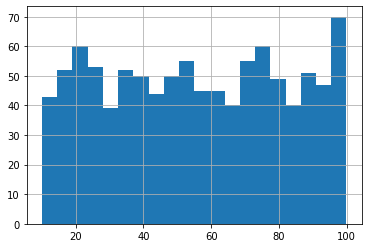

In [ ]:
df['Unit price'].hist(bins=20)

In [ ]:
def plot_by_cat(column, cat, nbins=10, by_one=False):
    print(f'Category: {cat}, Column: {column}')
    unique_cat = df[cat].unique()
    data = [(df[df[cat] == x][column], x) for x in unique_cat]
    data = [(df[column], 'ALL')] + data

    l = len(unique_cat) + 2 if by_one else 1

    fig, axes = plt.subplots(l, 1, sharex=True, sharey=False, figsize=(10,3 * l))
    q = 0

    for i in range(len(unique_cat) + 2 - 1):
        if i != 0:
            if l == 1:
                axes.hist(data[q][0], bins=nbins, alpha=0.5, label=data[q][1])
            else:
                axes[-1].hist(data[q][0], bins=nbins, alpha=0.5, label=data[q][1])
        if by_one:
            axes[i].set_title(data[q][1])
            axes[i].hist(data[q][0], bins=nbins)
        q += 1

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.legend()
    plt.show()

Похоже, что цены распределены почти равномерно. Давайте посмотрим по филиалам. 

In [ ]:
df.groupby('City')['Unit price'].mean()

City
Mandalay     55.659277
Naypyitaw    56.609024
Yangon       54.780853
Name: Unit price, dtype: float64

Category: City, Column: Unit price


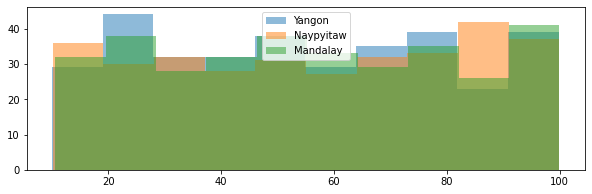

In [ ]:
plot_by_cat('Unit price', 'City')

Посмотрим общую сумму покупки в зависимости от города.

Category: City, Column: Total


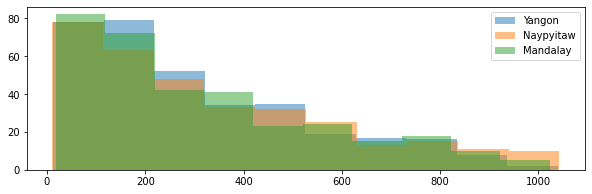

In [ ]:
plot_by_cat('Total', 'City')

Попробуем построить сразу много граффиков и найти что-нибудь интересное. Будем строить зависимости числовых и категориальных признаков от других категориальных с помощью гистограм.

In [ ]:
cat_columns = df.select_dtypes(include=['category']).columns
cat_columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

In [ ]:
digit_columns = df.select_dtypes(include=['float64', 'int64']).columns
digit_columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'Rating'], dtype='object')

Category: City, Column: Unit price


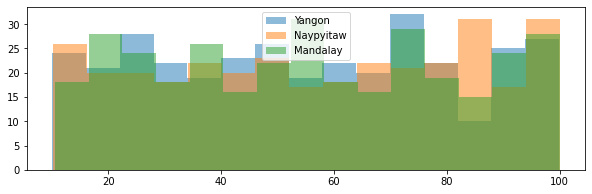

Category: City, Column: Quantity


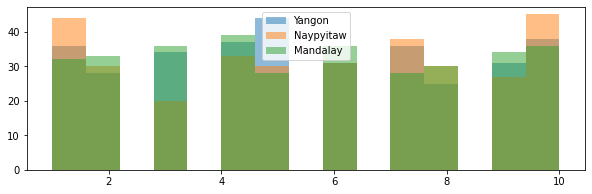

Category: City, Column: Tax 5%


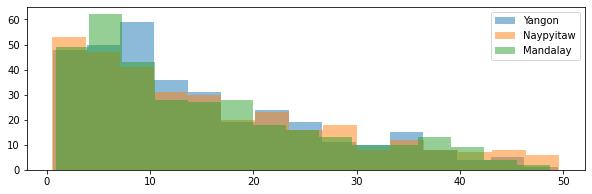

Category: City, Column: Total


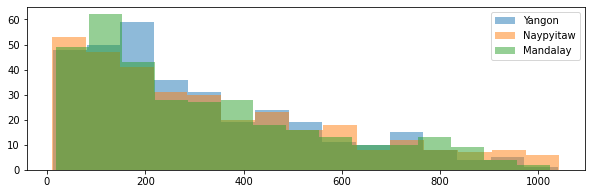

Category: City, Column: cogs


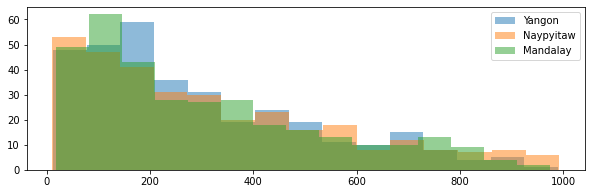

Category: City, Column: Rating


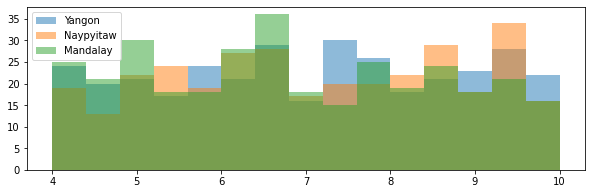

Category: City, Column: Customer type


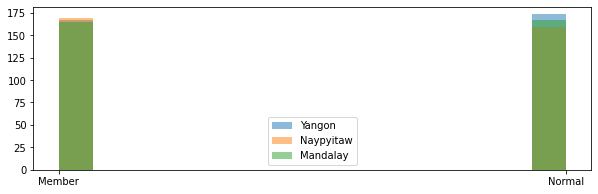

Category: City, Column: Gender


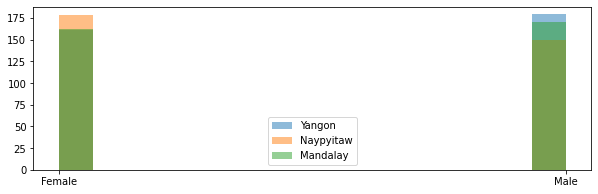

Category: City, Column: Product line


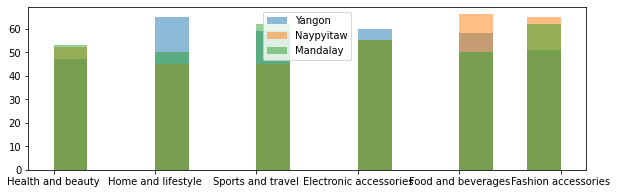

Category: City, Column: Payment


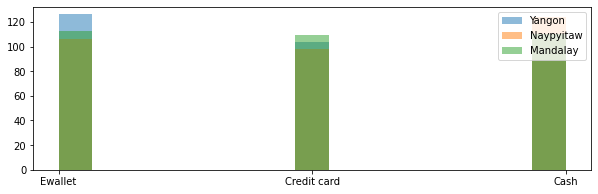

Category: Customer type, Column: Unit price


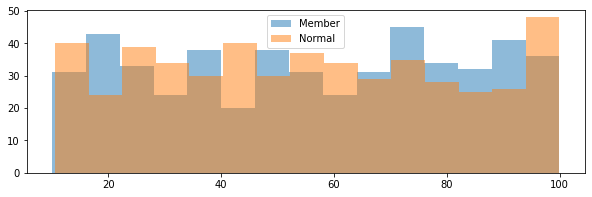

Category: Customer type, Column: Quantity


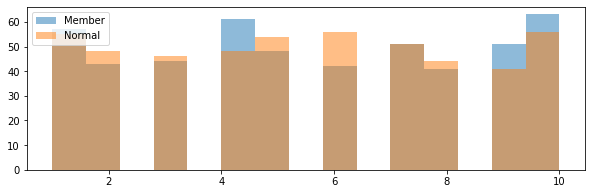

Category: Customer type, Column: Tax 5%


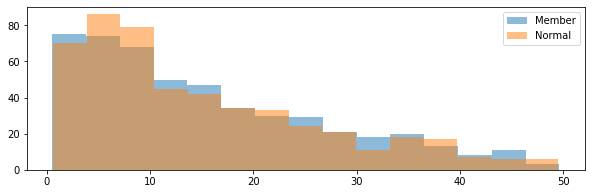

Category: Customer type, Column: Total


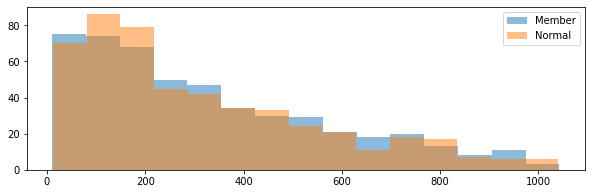

Category: Customer type, Column: cogs


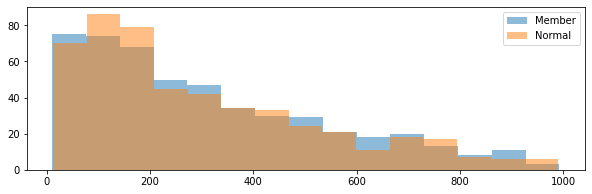

Category: Customer type, Column: Rating


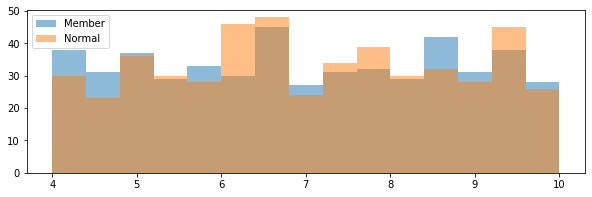

Category: Customer type, Column: City


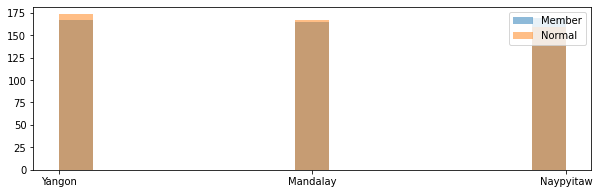

Category: Customer type, Column: Gender


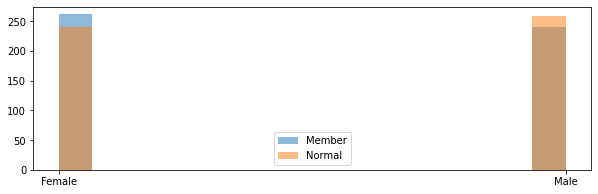

Category: Customer type, Column: Product line


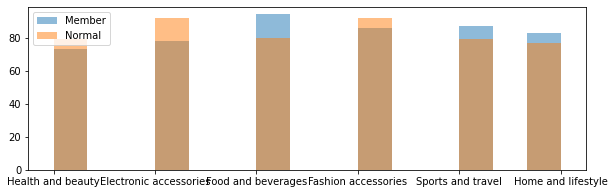

Category: Customer type, Column: Payment


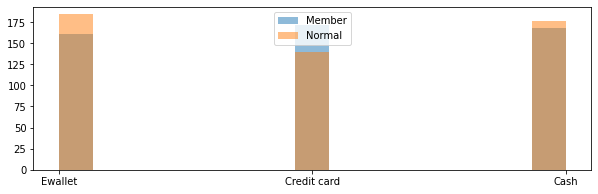

Category: Gender, Column: Unit price


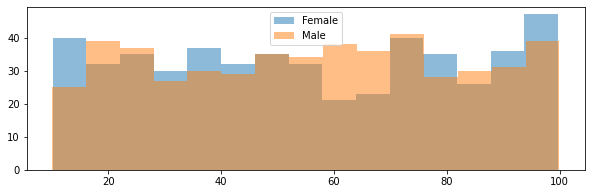

Category: Gender, Column: Quantity


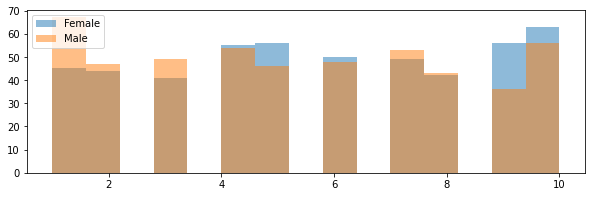

Category: Gender, Column: Tax 5%


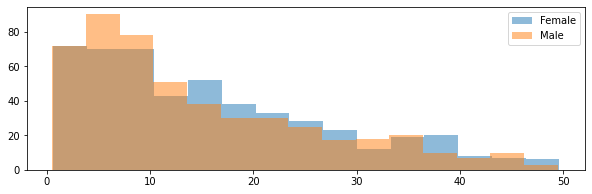

Category: Gender, Column: Total


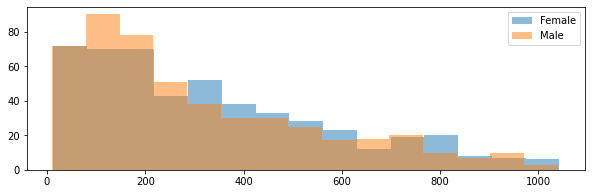

Category: Gender, Column: cogs


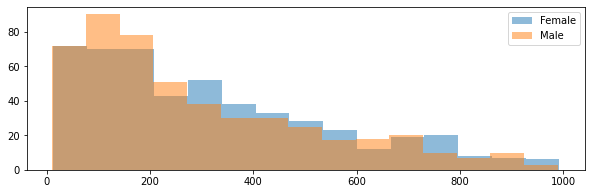

Category: Gender, Column: Rating


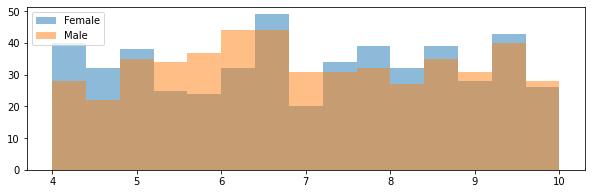

Category: Gender, Column: City


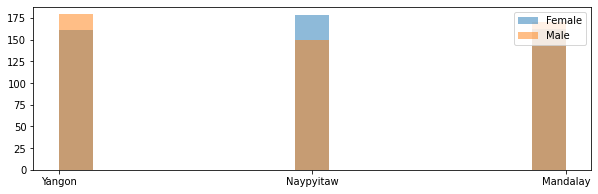

Category: Gender, Column: Customer type


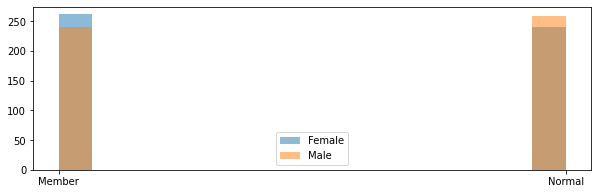

Category: Gender, Column: Product line


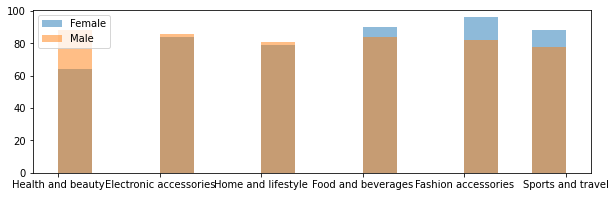

Category: Gender, Column: Payment


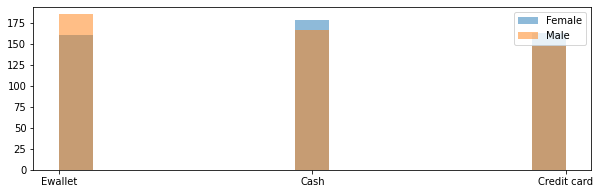

Category: Product line, Column: Unit price


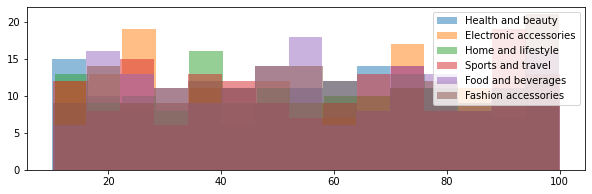

Category: Product line, Column: Quantity


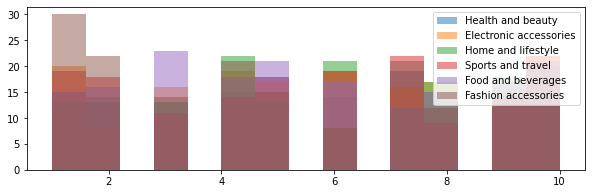

Category: Product line, Column: Tax 5%


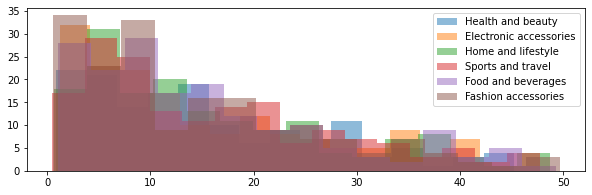

Category: Product line, Column: Total


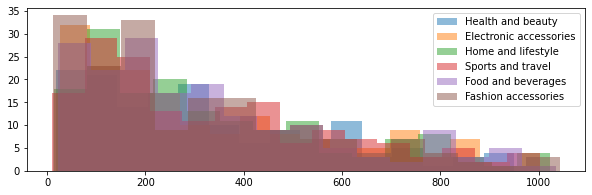

Category: Product line, Column: cogs


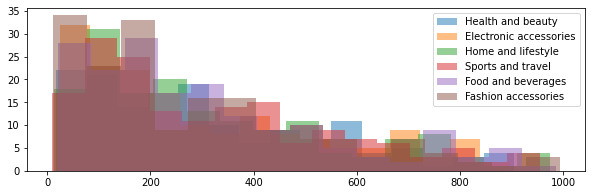

Category: Product line, Column: Rating


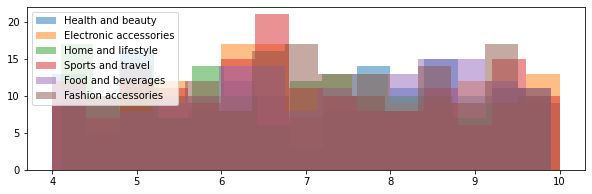

Category: Product line, Column: City


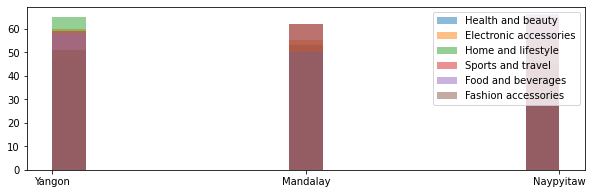

Category: Product line, Column: Customer type


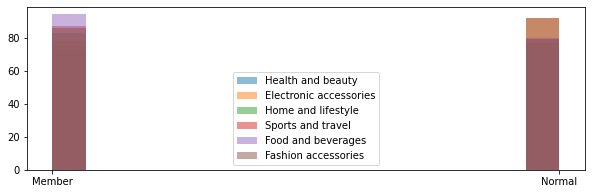

Category: Product line, Column: Gender


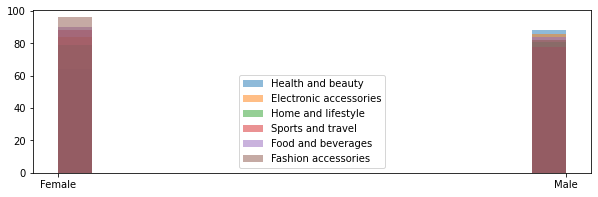

Category: Product line, Column: Payment


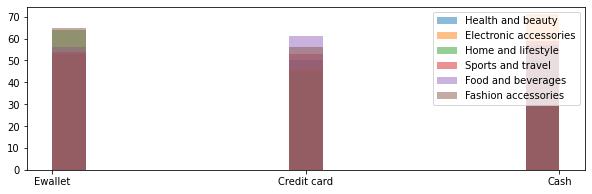

Category: Payment, Column: Unit price


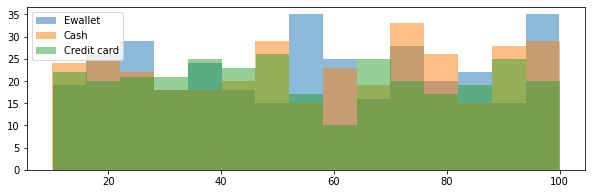

Category: Payment, Column: Quantity


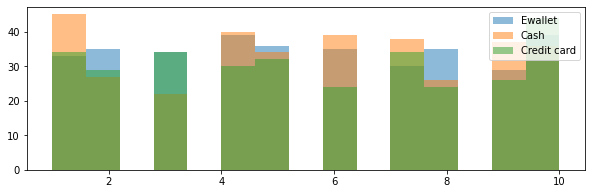

Category: Payment, Column: Tax 5%


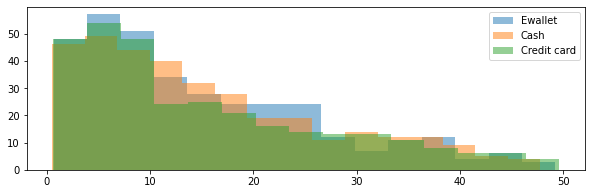

Category: Payment, Column: Total


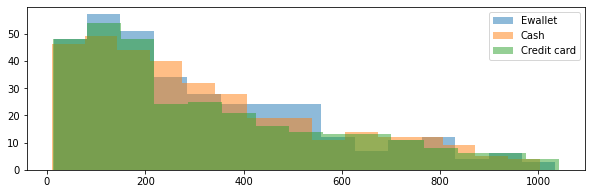

Category: Payment, Column: cogs


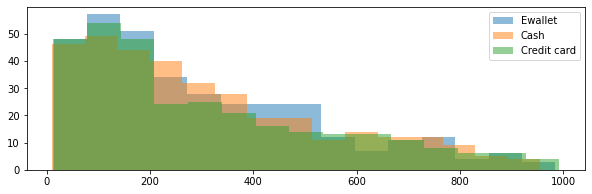

Category: Payment, Column: Rating


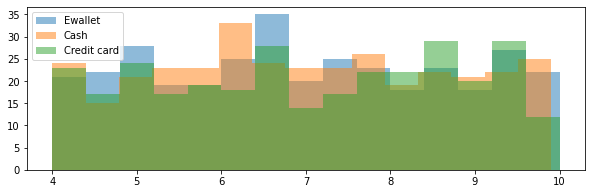

Category: Payment, Column: City


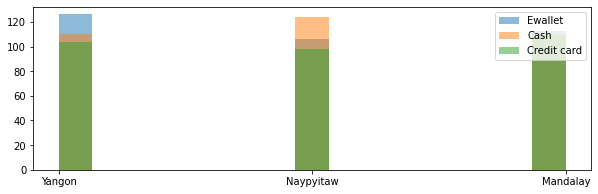

Category: Payment, Column: Customer type


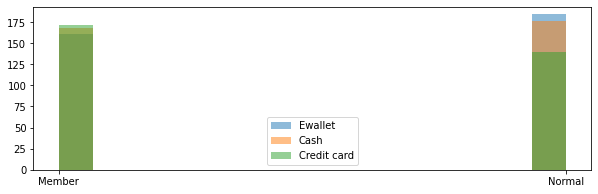

Category: Payment, Column: Gender


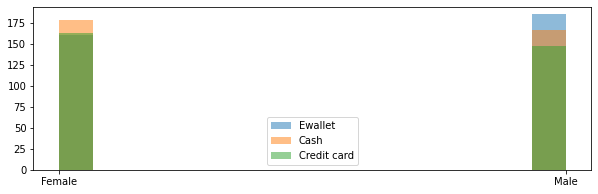

Category: Payment, Column: Product line


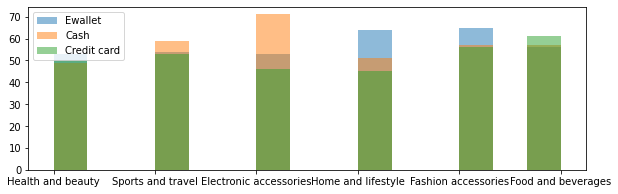

In [ ]:
for cat in cat_columns:
    for dig in list(digit_columns) + list(cat_columns):
        if dig != cat:
            plot_by_cat(dig, cat, nbins=15)

Глядя на все эти граффики, можно выделить пару интересных закономерностей.

Category: Payment, Column: Total


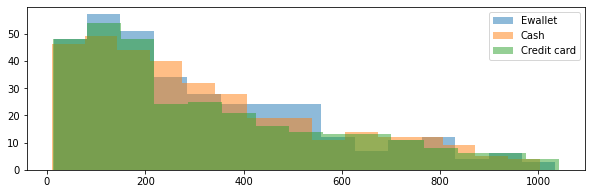

In [ ]:
plot_by_cat('Total', 'Payment', nbins=15)

In [ ]:
df_200_800 = df[(df['Total'] > 200) & (df['Total'] < 800)]

In [ ]:
df_200_800.groupby('Payment')['Total'].count()

Payment
Cash           193
Credit card    156
Ewallet        183
Name: Total, dtype: int64

Если общая покупка от 200 до 800, то люди чаще пользуются наличкой, хотя разница с электронными деньгами не такая большая, а всего люди пользуются кредитками реже, как мы выяснили до этого.

Складывается такое ощущение, что в городе Naypyitaw средний чек немного больше.

Category: City, Column: Total


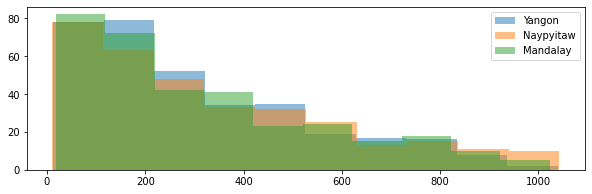

City
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031
Name: Total, dtype: float64

In [ ]:
plot_by_cat('Total', 'City')
df.groupby('City')['Total'].mean()

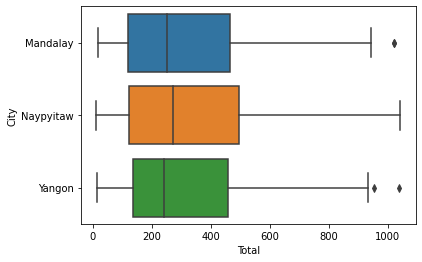

In [ ]:
sns.boxplot(y="City", x="Total", data=df, orient="h")

Действительно, похоже на правду. Но точно это проверить можно с помощью статистических гипотез в следующем пункте проекта.

Кажется, рейтинг покупателей в городе Mandalay меньше.

Category: City, Column: Rating


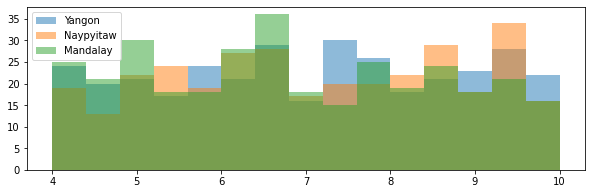

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

In [ ]:
plot_by_cat('Rating', 'City', nbins=15)
df.groupby('City')['Rating'].mean()

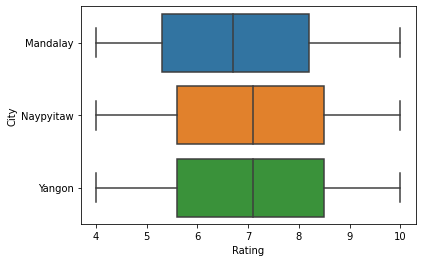

In [ ]:
sns.boxplot(y="City", x="Rating", data=df, orient="h")

Опять похоже на правду. Надо будет проверить это в следующем блоке.

Category: City, Column: Gender


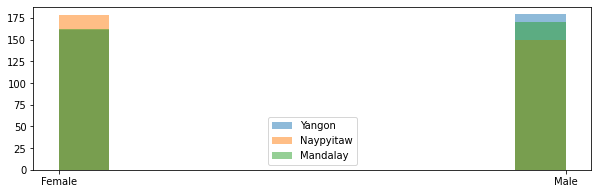

Category: City, Column: Product line


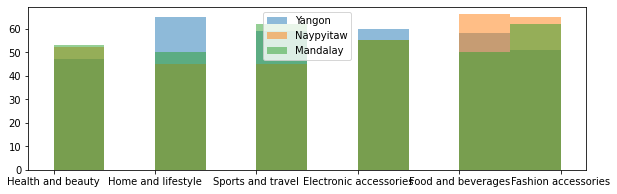

In [ ]:
plot_by_cat('Gender', 'City')
plot_by_cat('Product line', 'City')

Интересно, в городе Naypyitaw немного больше женщин среди покупателей, и при этом больше покупок в категории Еда и Мода.

А вот в городе Yangon немного больше мужчин, при этом больше покупок в категориях Дом и Электроника.

Category: Gender, Column: Product line


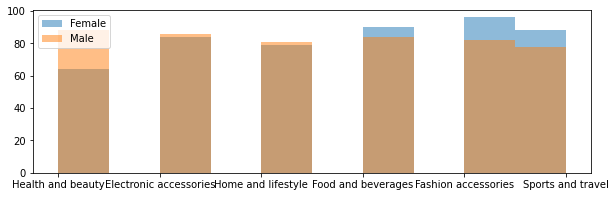

In [ ]:
plot_by_cat('Product line', 'Gender')

Женщин, что, наверное, очевидно, больше интересует категория "Мода" и "Спорт и Путешествия", а вот то, что у мужчин больше покупок в категории "Здоровье и Красота" меня удивило.

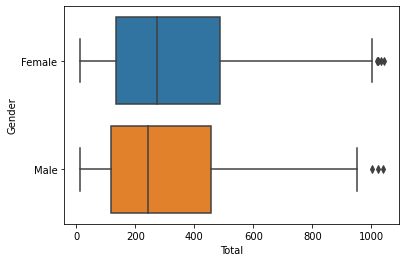

In [ ]:
sns.boxplot(y='Gender', x='Total', data=df, orient="h")

Еще можно заметить, что женщины покупают на чуть большие суммы.

Category: Customer type, Column: Gender


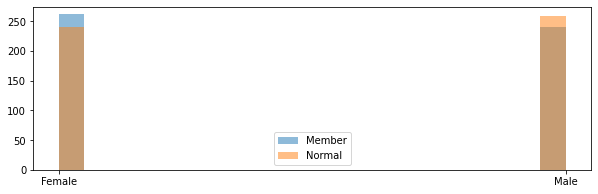

In [ ]:
plot_by_cat('Gender', 'Customer type')

Кажется, женщины чаще являются держателями карт лояльности, чем мужчины.

Category: Customer type, Column: Total


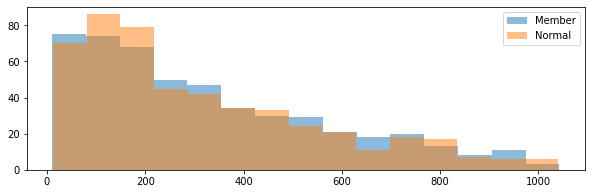

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64
Customer type
Member    266.028
Normal    237.426
Name: Total, dtype: float64


In [ ]:
plot_by_cat('Total', 'Customer type', nbins=15)
print(df.groupby('Customer type')['Total'].mean())
print(df.groupby('Customer type')['Total'].median())

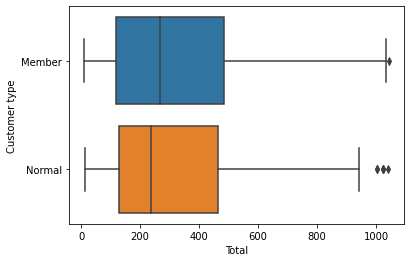

In [ ]:
sns.boxplot(y="Customer type", x="Total", data=df, orient="h")

Похоже на то, что владельцы карт лояльности действительно покупают немного на большие суммы.

In [ ]:
digit_columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'Rating'], dtype='object')

In [ ]:
cat_columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

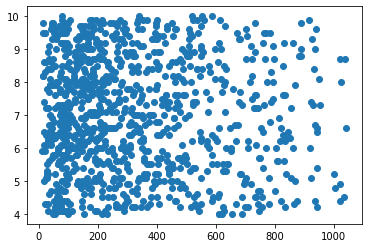

In [ ]:
plt.scatter(df['Total'], df['Rating'])

Кажется, рейтинг и общая сумма покупки никак не коррелируют между собой.

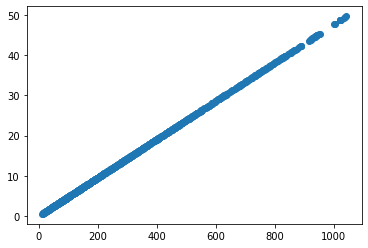

In [ ]:
plt.scatter(df['Total'], df['Tax 5%'])

Налог линейно зависит от общей суммы покупки, что достаточно очевидно.

In [ ]:
df['DateTime']

0     2019-01-05 13:08:00
1     2019-03-08 10:29:00
2     2019-03-03 13:23:00
3     2019-01-27 20:33:00
4     2019-02-08 10:37:00
              ...        
995   2019-01-29 13:46:00
996   2019-03-02 17:16:00
997   2019-02-09 13:22:00
998   2019-02-22 15:33:00
999   2019-02-18 13:28:00
Name: DateTime, Length: 1000, dtype: datetime64[ns]

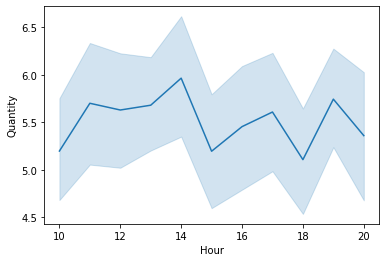

In [ ]:
sns.lineplot(x='Hour', y='Quantity', data=df)

Кажется, больше всего продаж приходится на 14 часов.

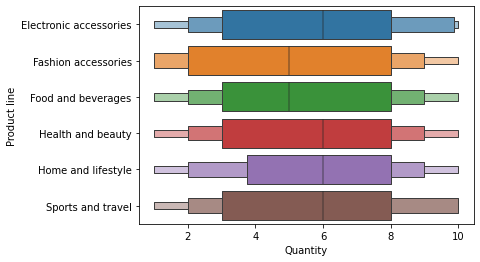

In [ ]:
sns.boxenplot(y='Product line', x='Quantity', data=df)

Средние количество продаж в категории мода и еда меньше, чем в остальных.

## Проверка статистических гипотез

Проверка статистических гипотез (5 баллов) - сформулировать статистические гипотезы в данных и проверить их с помощью статистических критериев (например - если это временной ряд, то изучить, изменились ли средние до и после определённого периода, или можно сравнить данные из разных групп). Как минимум – проверить 2 статистические гипотезы, должен быть использован любой параметрический и любой непараметрический критерий. Каждый шаг должен сопровождаться комментариями, должны быть сделаны выводы.

Проверим гипотезы, которые появились в предыдущем пункте.

In [ ]:
from scipy import stats

In [ ]:
digit_columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'Rating'], dtype='object')

### Гипотеза 1

$H_0\colon$ общая сумма покупок в двух городах одинакова

$H_1\colon$ общая сумма покупок в двух городах различна

(рассмотрим все 3 пары)

In [ ]:
city_totals = [df['Total'][df['City'] == x] for x in city_names]

Для начала проверим данные на нормальность.

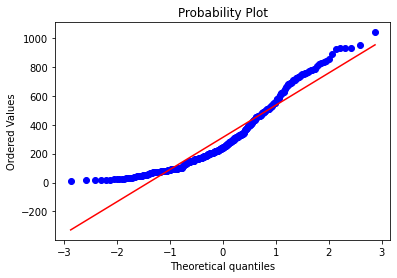

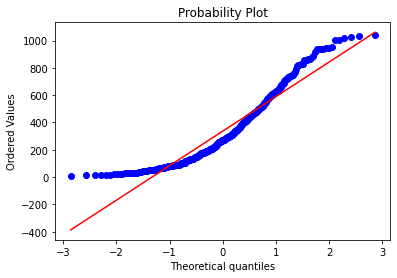

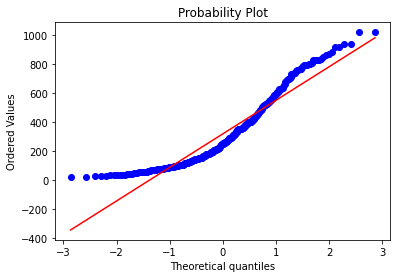

In [ ]:
#c помощью Q-Q графика

for total in city_totals:
    stats.probplot(total, dist = "norm", plot = plt)
    plt.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [ ]:
for total in city_totals:
    print(stats.shapiro(total))

(0.9122301340103149, 3.5383965180622867e-13)
(0.9095211625099182, 3.975803247822235e-13)
(0.9022482633590698, 8.284519581848795e-14)


Получается, все эти распределения не являются нормальными (что было видно уже на визуальном анализе), значит мы не можем применять параметрические критерии. 

*К сожалению, здесь все данные распределены не нормально, так что, надеюсь, на баллы это влиять не будет.*

Применим критерий для доли (Z-критерий для несвязанных выборок).

In [ ]:
city_names

['Yangon', 'Naypyitaw', 'Mandalay']
Categories (3, object): ['Yangon', 'Naypyitaw', 'Mandalay']

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = [total[total > total.mean()].shape[0] for total in city_totals]
nobs = [total.shape[0] for total in city_totals]

print(count)
print(nobs)

[137, 135, 136]
[340, 328, 332]


$H_0\colon$ Доля людей, у которых общая сумма покупки больше средей в двух городах (Yangon и Naypyitaw) равны.

$H_1\colon$ Доля людей, у которых общая сумма покупки больше средей в  городе Naypyitaw больше, чем Yangon.

In [ ]:
print(proportions_ztest(count[:2], nobs[:2], alternative='smaller'))

(-0.2273300459837106, 0.4100835556608478)


Мы не можем отвергнуть нулевую гипотезу.

$H_0\colon$ Доля людей, у которых общая сумма покупки больше средей в двух городах (Mandalay и Naypyitaw) равны.

$H_1\colon$ Доля людей, у которых общая сумма покупки больше средей в  городе Naypyitaw больше, чем Mandalay.

In [ ]:
print(proportions_ztest(count[1:][::-1], nobs[1:][::-1], alternative='smaller'))

(-0.05083261114348318, 0.47972945226237707)


Мы не можем отвергнуть нулевую гипотезу.

### Гипотеза 2

Проверим гипотезу о том, что рейтинг покупателей в городе Mandalay меньше, чем в двух других.

In [ ]:
city_names

['Yangon', 'Naypyitaw', 'Mandalay']
Categories (3, object): ['Yangon', 'Naypyitaw', 'Mandalay']

In [ ]:
city_ratings = [df['Rating'][df['City'] == x] for x in city_names]

$H_0\colon$ Рейтинг покупаталей в городах Mandalay и Naypyitaw равны.

$H_1\colon$ Рейтинг покупаталей в городе Mandalay меньше, чем в Naypyitaw.

In [ ]:
stats.mannwhitneyu(city_ratings[2], city_ratings[1], alternative='less')

MannwhitneyuResult(statistic=49811.5, pvalue=0.029165176123532283)

При уровне значимости в 5% наша нулевая гипотеза отвергается, а значит в городе Mandalay рейтинг покупателей меньше, чем в городе Naypyitaw.

$H_0\colon$ Рейтинг покупаталей в городах Mandalay и Yangon равны.

$H_1\colon$ Рейтинг покупаталей в городе Mandalay меньше, чем в Yangon.

In [ ]:
stats.mannwhitneyu(city_ratings[2], city_ratings[0], alternative='less')

MannwhitneyuResult(statistic=52494.0, pvalue=0.058398024890702234)

При уровне значимости в 5% наша нулевая гипотеза не отвергается.

### Гипотеза 3

Проверим с помощью статистического критерия Стьюдента, что общая сумма покупки и рейтинг действительно никак не коррелируют.

In [ ]:
df[['Total', 'Rating']].corr()

,Total,Rating
Total,1.000000,-0.036442
Rating,-0.036442,1.000000


$H_0\colon$ Корреляция = 0

$H_1\colon$ Корреляция != 0

In [ ]:
stats.pearsonr(df['Total'],df['Rating'])

(-0.03644170499701834, 0.24959690975440144)

Действительно, мы не можем отвергнуть нулевую гипотезу.

### Гипотеза 4

Проверим, как зависит общая сумма покупки от того, есть ли у покупателя карта лояльности или нет. Для этого опять воспользуемся критерием Манна-Уитни (выборки не связаны).

In [ ]:
total_cust_type = [df['Total'][df['Customer type'] == x] for x in ['Normal', 'Member']]

$H_0\colon$ Общая сумма покупок людей с картами лояльности и без одинаковы.

$H_1\colon$ Общая сумма покупок людей с картами лояльности и без различаются.

In [ ]:
stats.mannwhitneyu(total_cust_type[0], total_cust_type[1], alternative='two-sided')

MannwhitneyuResult(statistic=122546.0, pvalue=0.5911585128075683)

Мы не можем отвергнуть нулевую гипотезу.

## Предсказание временного ряда

Построить предсказание временного ряда (5 баллов).

Для начала сделаем небольшую предобработку данных.

Мы будем анализировать сумму покупок по каждому часу каждого дня, соответственно нам нужна соответствующая колонка DateHour.

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
from datetime import datetime, timedelta

In [ ]:
df = df.sort_values('DateTime')

In [ ]:
df['DateHour'] = list(map(datetime, df['DateTime'].dt.year, df['DateTime'].dt.month, df['DateTime'].dt.day, df['DateTime'].dt.hour))

In [ ]:
total_data = df.groupby('DateHour').sum()['Total']
qu_data = df.groupby('DateHour').sum()['Quantity']
count_data = df.groupby('DateHour').count()['Invoice ID']

Сделаем так, чтобы все данные у нас были заполнены (то есть были данные на каждый час от 00 до 23 часов)

In [ ]:
cur_day = datetime(2019,1,1, 0)
while cur_day < datetime(2019, 3, 31):
    if cur_day not in total_data.index:
        total_data.loc[cur_day] = 0
        qu_data.loc[cur_day] = 0
        count_data.loc[cur_day] = 0
    cur_day = cur_day + timedelta(hours=1)

total_data = total_data.sort_index()
qu_data = qu_data.sort_index()
count_data = count_data.sort_index()

In [ ]:
data = total_data

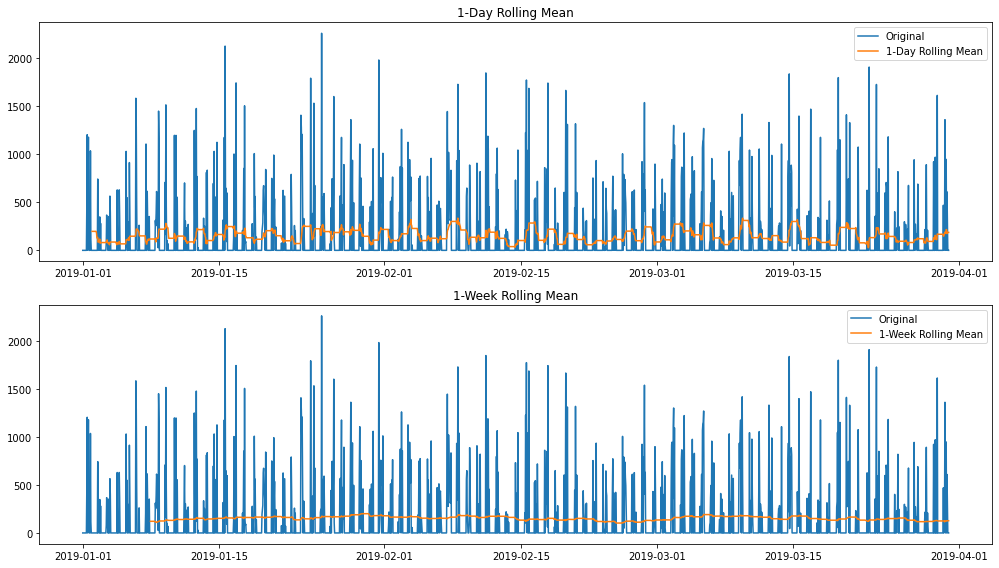

In [ ]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 24
axes[0].plot(data.index, data, label='Original')
axes[0].plot(data.index, data.rolling(window=window).mean(), label='1-Day Rolling Mean')
axes[0].set_title("1-Day Rolling Mean")
axes[0].legend(loc='best')

window = 24 * 7
axes[1].plot(data.index, data, label='Original')
axes[1].plot(data.index, data.rolling(window=window).mean(), label='1-Week Rolling Mean')
axes[1].set_title("1-Week Rolling Mean")
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

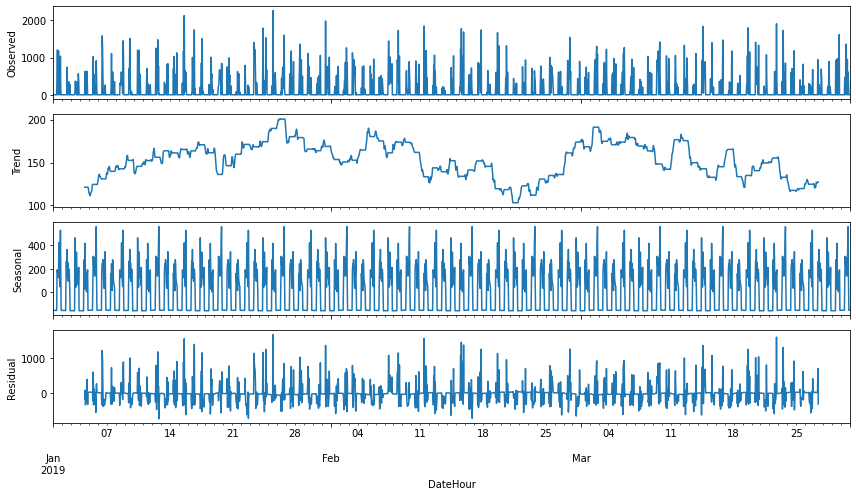

In [ ]:
# STL-декомпозиция ряда
rcParams['figure.figsize'] = 12, 7
result = sm.tsa.seasonal_decompose(data, model='add', freq=24*7)
result.plot()
plt.show()

Качество временных данных в этом датасете меня не радует. Я пробовал разные комбинации, в том числе сумму трат по дням, но решил остановиться на сумме покупок по каждому часу. Так как иногда сумма покупок за час равна 0, но MAPE может быть равен inf. Я просто решил оставить это в выводе, но мы будем ориентироваться на RMSE.

Как можно заметить, я пробовал предсказывать не только общую сумму покупок по часам, но и количество проданных товаров. Результаты (по ошибкам) получились примерно одинаковые.

Я сделаю вывод по временным предсказаниям после всех записей кода.

Начнем предсказания. Будем предсказывать сумму трат на следующую неделю и то, когда сумма покупок будет больше.

In [ ]:
w_days = 24 * 7
train = data.iloc[:-w_days]
val   = data.iloc[-w_days:]

train = pd.DataFrame(train)
val = pd.DataFrame(val)

train.rename(columns={'Quantity': 'data', 'Total': 'data', 'Invoice ID': 'data'}, inplace=True)
val.rename(columns={'Quantity': 'data', 'Total': 'data', 'Invoice ID': 'data'}, inplace=True)

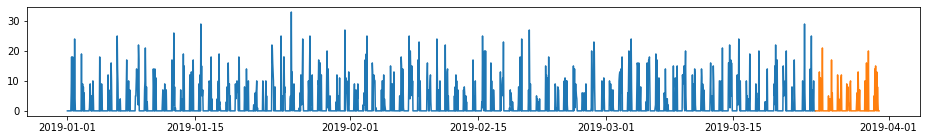

In [ ]:
plt.figure(figsize=(16,2))

plt.plot(train.data)
plt.plot(val.data)

plt.show()

#### Функции

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
    
def rmse(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def smape(y_true, y_pred): 
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

In [ ]:
def validate(y_true, y_pred):
    print('RMSE - ', rmse(y_true, y_pred))
    print('MAPE - ', mean_absolute_percentage_error(y_true,  y_pred))
    print('SMAPE - ', smape(y_true, y_pred))

Модели (давайте пройдемся по большей части того, что было в лекции)

In [ ]:
# Baseline
def baseline_model(train, test_len):
    return [train.mean()] * test_len

# Плавающее (взвешенное) среднее (при n=1 - предсказание последними test_len данными)
def last_model(train, test_len, n=1, weights=None):
    if n * test_len > train.shape[0]:
        #print('Train size is too small')
        return None
    tr_sample =  train[-n * test_len:]
    preds_arr = np.array(tr_sample).reshape(n,-1)

    if weights is None:
        preds = preds_arr.mean(axis=0)
    else:
        preds_arr_W = np.array([preds_arr[x] * weights[x] for x in range(len(weights))])
        preds = preds_arr_W.sum(axis = 0)

    return preds

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Экспоненциальное сглаживание
def exp_model(train, test_len, smoothing_level=0.5):
    fit = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=smoothing_level, optimized=False)
    return fit.forecast(test_len)

# Двойное экспоненциальное сглаживание
def exp2_model(train, test_len, smoothing_level=0.5, smoothing_slope=0.5):
    fit = Holt(np.asarray(train)).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
    return fit.forecast(test_len)

# Тройное экспоненциальное сглаживание
def exp3_model(train, test_len, seasonal_periods=24, trend=None, seasonal='add'):
    fit = ExponentialSmoothing(np.asarray(train), seasonal_periods=seasonal_periods, trend=trend, seasonal=seasonal).fit()
    return fit.forecast(test_len)

Валидация для временного ряда

In [ ]:
from sklearn.model_selection import TimeSeriesSplit 

def tss_validate(model, **model_params):
    errors = []
    tscv = TimeSeriesSplit(n_splits=12)

    for train_idx, test_idx in tscv.split(data):
        preds = model(np.asarray(data.iloc[train_idx]), len(test_idx), **model_params)
        if preds is None:
            continue

        actual = data.iloc[test_idx]
        error = rmse(actual.values, preds)
        errors.append(error)
    
    return np.mean(errors)

### Baseline

In [ ]:
validate(val.data, baseline_model(train.data, w_days))

RMSE -  4.393428654860735
MAPE -  inf
SMAPE -  168.40127053918863


RMSE -  329.45724937131524


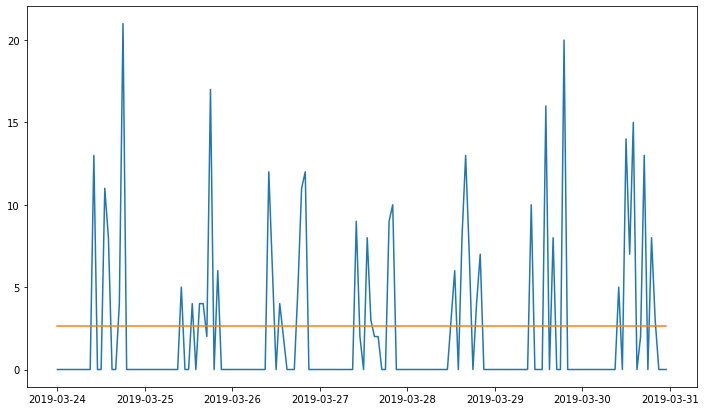

In [ ]:
model = baseline_model

print('RMSE - ', tss_validate(model))

preds = pd.Series(model(train.data, len(val.data)))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Предсказание плавающим средним

In [ ]:
validate(val.data, last_model(train.data, w_days, n=4))

RMSE -  4.070756262369321
MAPE -  inf
SMAPE -  121.27180962190423



BEST RMSE -  329.2961166949335
{'n': 7}


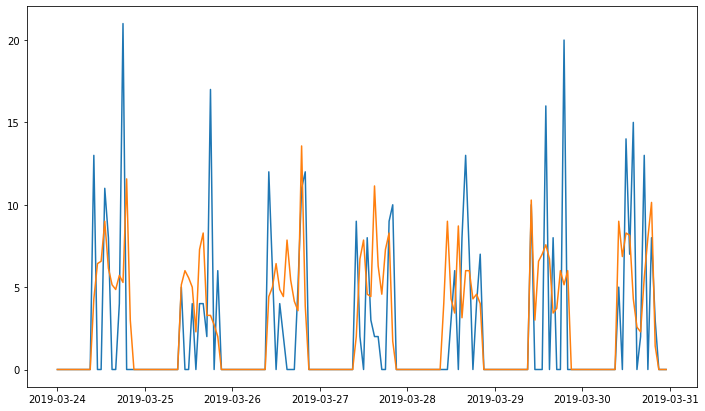

In [ ]:
model = last_model

parameters = {
    'n': np.linspace(1, 10, 10, dtype=int),
}

keys = parameters.keys()
best_score = np.inf
best_param = None

for cur_param in tqdm(list(product(*parameters.values()))):
    params_to_set = {}
    for i, key in enumerate(keys):
        params_to_set[key] = cur_param[i]
    score = tss_validate(model, **params_to_set)
    if score < best_score:
        best_score = score
        best_param = params_to_set

print('BEST RMSE - ', best_score)
print(best_param)

preds = pd.Series(model(train.data, len(val.data), **best_param))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Взвешенное среднее

In [ ]:
validate(val.data, last_model(train.data, w_days, n=7, weights=[0.2, 0.2, 0.3, 0.3]))

RMSE -  4.374418328679336
MAPE -  inf
SMAPE -  124.35658948987012



BEST RMSE -  380.4948107732788
{'n': 4, 'weights': [0.2, 0.2, 0.3, 0.3]}


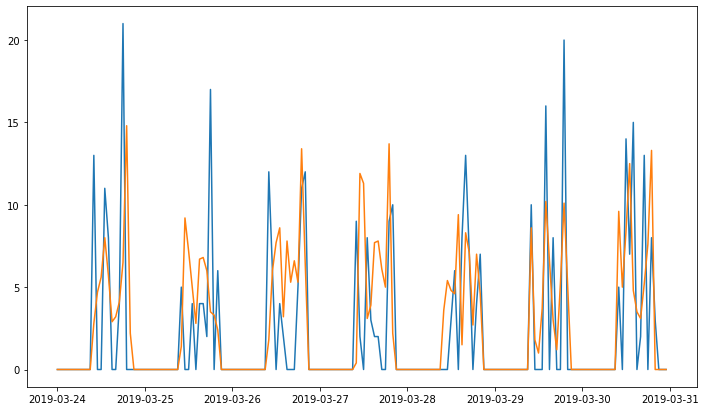

In [ ]:
model = last_model

parameters = {
    'n': [4],
    'weights': [
                None,
                [0.2, 0.2, 0.3, 0.3],
                [0.1, 0.2, 0.3, 0.4],
                [0.1, 0.1, 0.1, 0.7],
                [0.3, 0.3, 0.2, 0.2]
    ]
}

keys = parameters.keys()
best_score = np.inf
best_param = None

for cur_param in tqdm(list(product(*parameters.values()))):
    params_to_set = {}
    for i, key in enumerate(keys):
        params_to_set[key] = cur_param[i]
    score = tss_validate(model, **params_to_set)
    if score < best_score:
        best_score = score
        best_param = params_to_set

print('BEST RMSE - ', best_score)
print(best_param)

preds = pd.Series(model(train.data, len(val.data), **best_param))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Экспоненциальное сглаживание

In [ ]:
validate(val.data, exp_model(train.data, w_days, smoothing_level=0.5))

RMSE -  4.715622250046935
MAPE -  inf
SMAPE -  192.24021536325128



BEST RMSE -  329.98251844284067
{'smoothing_level': 0.01}


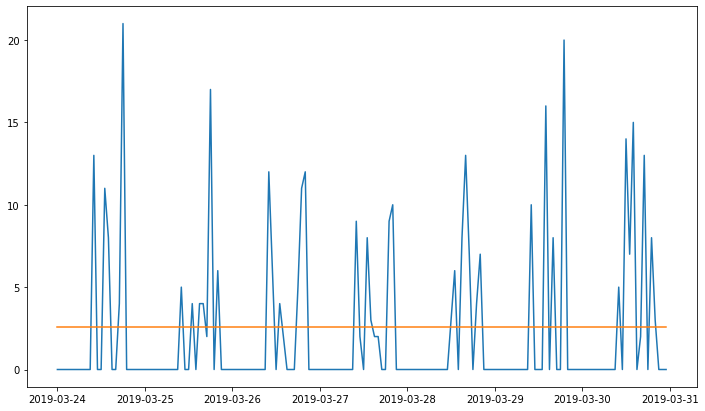

In [ ]:
model = exp_model

parameters = {
    'smoothing_level': np.linspace(0.01, 1, 100),
}

keys = parameters.keys()
best_score = np.inf
best_param = None

for cur_param in tqdm(list(product(*parameters.values()))):
    params_to_set = {}
    for i, key in enumerate(keys):
        params_to_set[key] = cur_param[i]
    score = tss_validate(model, **params_to_set)
    if score < best_score:
        best_score = score
        best_param = params_to_set

print('BEST RMSE - ', best_score)
print(best_param)

preds = pd.Series(model(train.data, len(val.data), **best_param))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Двойное экспоненциальное сглаживание

In [ ]:
validate(val.data, exp2_model(train.data, w_days, smoothing_level=0.6, smoothing_slope=0.4))

RMSE -  80.94951748019537
MAPE -  inf
SMAPE -  200.0



BEST RMSE -  1042.1923864471707
{'smoothing_level': 0.1, 'smoothing_slope': 0.1}


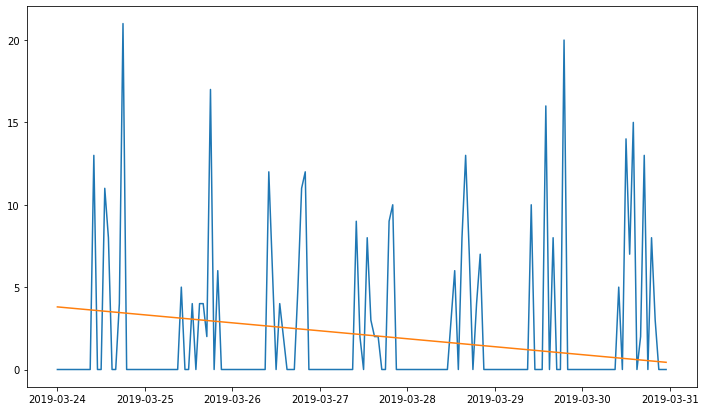

In [ ]:
model = exp2_model

parameters = {
    'smoothing_level': np.linspace(0.1, 1, 10),
    'smoothing_slope': np.linspace(0.1, 1, 10),
}

keys = parameters.keys()
best_score = np.inf
best_param = None

for cur_param in tqdm(list(product(*parameters.values()))):
    params_to_set = {}
    for i, key in enumerate(keys):
        params_to_set[key] = cur_param[i]
    score = tss_validate(model, **params_to_set)
    if score < best_score:
        best_score = score
        best_param = params_to_set

print('BEST RMSE - ', best_score)
print(best_param)

preds = pd.Series(model(train.data, len(val.data), **best_param))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Тройное экспоненциальное сглаживание

In [ ]:
validate(val.data, exp3_model(train.data, w_days, seasonal_periods=24, trend=None, seasonal='add'))

RMSE -  3.763142817423055
MAPE -  inf
SMAPE -  160.40990908420233


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




BEST RMSE -  290.4377185304208
{'seasonal_periods': 24, 'trend': None, 'seasonal': 'add'}


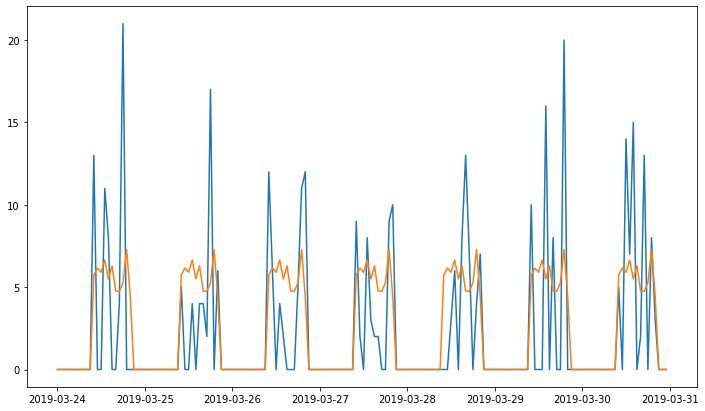

In [ ]:
model = exp3_model

parameters = {
    'seasonal_periods': [24],
    'trend': [None, 'add'],
    'seasonal': [None, 'add']
}

keys = parameters.keys()
best_score = np.inf
best_param = None

for cur_param in tqdm(list(product(*parameters.values()))):
    params_to_set = {}
    for i, key in enumerate(keys):
        params_to_set[key] = cur_param[i]
    score = tss_validate(model, **params_to_set)
    if score < best_score:
        best_score = score
        best_param = params_to_set

print('BEST RMSE - ', best_score)
print(best_param)

preds = pd.Series(model(train.data, len(val.data), **best_param))
preds.index = val.index

plt.plot(val.data)
plt.plot(preds)

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train['label'] = 'train'
val['label'] = 'val'

df_log_reg = pd.concat((train,val), axis=0)
df_log_reg['target'] = np.where(df_log_reg.label == 'train', df_log_reg.data, np.nan)
df_log_reg.head(12)

,data,label,target
DateHour,,,
2019-01-01 00:00:00,0,train,0.0
2019-01-01 01:00:00,0,train,0.0
2019-01-01 02:00:00,0,train,0.0
2019-01-01 03:00:00,0,train,0.0
2019-01-01 04:00:00,0,train,0.0
2019-01-01 05:00:00,0,train,0.0
2019-01-01 06:00:00,0,train,0.0
2019-01-01 07:00:00,0,train,0.0
2019-01-01 08:00:00,0,train,0.0


In [ ]:
# лаговые фичи
lag_period = 24 * 7
features = []
for period_mult in range(1,8,1):
    df_log_reg["lag_period_{}".format(period_mult)] = df_log_reg.target.shift(period_mult*lag_period)
    features.append("lag_period_{}".format(period_mult))

# лаговые статистики
df_log_reg['lagf_mean'] = df_log_reg[features].mean(axis = 1)

features.extend(['lagf_mean'])

In [ ]:
model = LinearRegression()
train_df = df_log_reg[df_log_reg.label == 'train'][features + ['target']].dropna()
test_df = df_log_reg[df_log_reg.label == 'val'][features]

model.fit(train_df.drop('target', axis = 1) ,train_df['target'])
forecast = model.predict(test_df)

In [ ]:
test_df['prediction'] = forecast

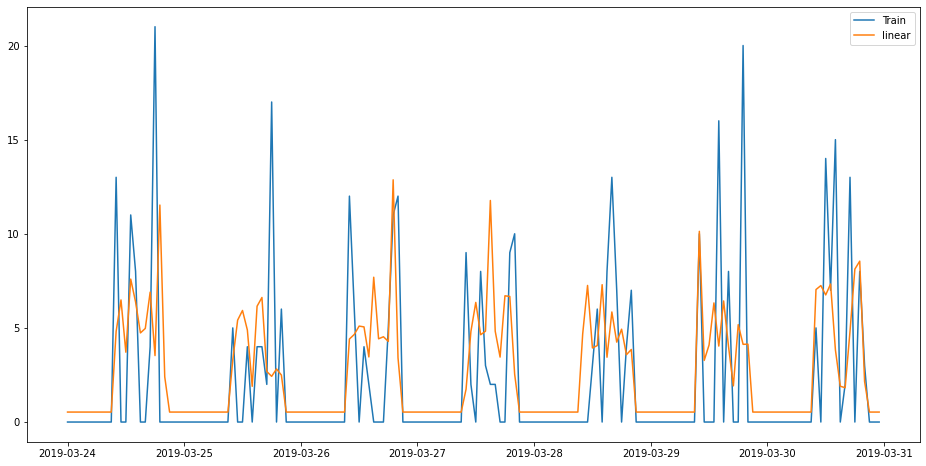

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(val.data, label='Train')
plt.plot(test_df.prediction, label='linear')
plt.legend(loc='best')
plt.show()

In [ ]:
validate(val.data, test_df.prediction)

RMSE -  4.05790714397168
MAPE -  inf
SMAPE -  161.9927169587545


In [ ]:
def plotCoefficients(model,train_features):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, train_features)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

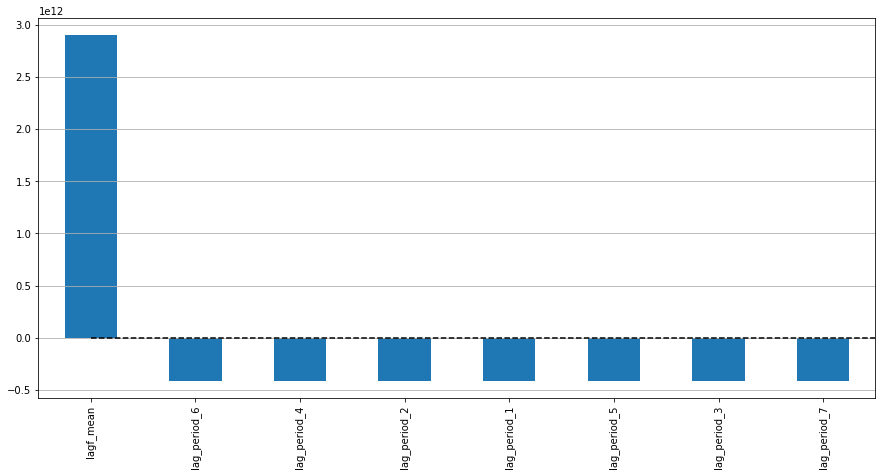

In [ ]:
plotCoefficients(model,features)

### Prophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
train.head()

,data,label
DateHour,,
2019-01-01 00:00:00,0,train
2019-01-01 01:00:00,0,train
2019-01-01 02:00:00,0,train
2019-01-01 03:00:00,0,train
2019-01-01 04:00:00,0,train


In [ ]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(train.index)
train_dataset['y']  = train.data.values
train_dataset.head(2)

,ds,y
0,2019-01-01 00:00:00,0
1,2019-01-01 01:00:00,0


In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = prophet_basic.make_future_dataframe(periods=24, freq ='H')
future.tail(2)

,ds
1990,2019-03-24 22:00:00
1991,2019-03-24 23:00:00


In [ ]:
forecast = prophet_basic.predict(future)

In [ ]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,2.516781,-5.813249,5.352696,2.516781,2.516781,-3.105970,-3.105970,-3.105970,-2.876985,-2.876985,-2.876985,-0.228985,-0.228985,-0.228985,0.0,0.0,0.0,-0.589189
1,2019-01-01 01:00:00,2.516979,-5.806392,5.414741,2.516979,2.516979,-2.726604,-2.726604,-2.726604,-2.525023,-2.525023,-2.525023,-0.201581,-0.201581,-0.201581,0.0,0.0,0.0,-0.209625


In [ ]:
preds = forecast['yhat'].iloc[-w_days:]
preds.index = val.index

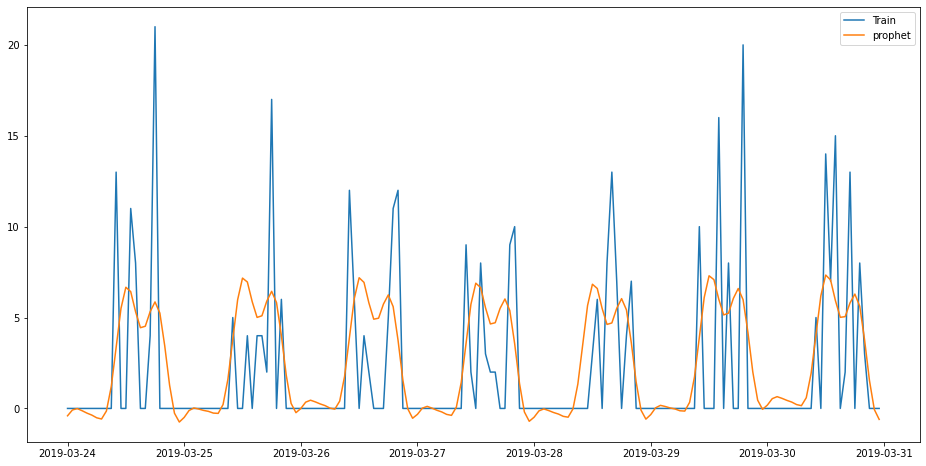

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(val.data, label='Train')
plt.plot(preds, label='prophet')
plt.legend(loc='best')
plt.show()

In [ ]:
validate(val.data, forecast['yhat'].iloc[-w_days:].values)

RMSE -  3.880295207895002
MAPE -  inf
SMAPE -  161.85637452986828


### Итоги предсказания

Лучше всего себя показали модели тройного экспоненциального сглаживания, линейная регрессия и prophet.

Я уверен, что объединение этих моделей даст результат еще лучше, но (из-за большого количества дедлайнов) буду применять эти знания в соревновании на kaggle.

А пока предскажем сумму трат по часам на следующую неделю с помощью тройног оэкспоненциального сглаживания.

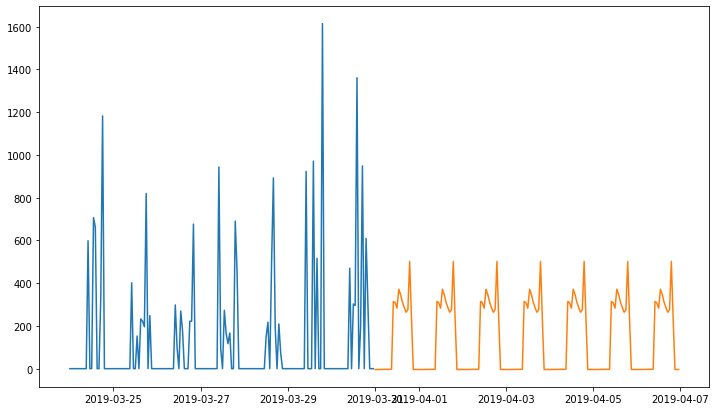

In [ ]:
predict = pd.Series(exp3_model(data, w_days))

idx = []

cur_day = datetime(2019,3,31,0)
while cur_day < datetime(2019, 4, 7):
    idx.append(cur_day)
    cur_day = cur_day + timedelta(hours=1)

predict.index = idx

plt.plot(data[-w_days:])
plt.plot(predict)

Думаю, предсказание достаточно неплохое и ожидаемое. Модель предсказала, что вечером сумма покупок будет больше.

## Выводы

Сделать выводы о проделанном исследовании (2 балла) - указать, какие инсайты были найдены, о чем свидетельствует сделанный прогноз и выводы, полученные в ходе проверки статистических гипотез.

Главное, что мне удалось сделать в этом проекте - закрепить на практике принципы работы с данными. Мне действительно показалась данная работа интересной и полезной.

Прогноз временного ряда предсказал, что вечером сумма покупок будет больше.

Визуально мы предположили, что в городе Mandalay рейтинг покупателей меньше, чем в городе Naypyitaw. С помощью статистических гипотез нам удалось это подтвердить.

Также с помощью статистических гипотез мы поняли, что рейтинг покупателя не влияет на сумму его покупки.

На основе имеющихся данных, проведенного мной визуального анализа и проверкой гипотез, мне удалось выяснить, что в данном магазине наличие карты лояльности не влияет на сумму покупки.